In [1]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Downloads/2) Stock Prices Data Set.csv")

df.head()


,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [5]:
#Filter for AAPL
df_aapl = df[df['symbol'] == 'AAPL']

# Convert 'date' column to datetime format and set as index 
df_aapl = df[df['symbol'] == 'AAPL'].copy()

# Now it's safe to convert date column
df_aapl['date'] = pd.to_datetime(df_aapl['date'])
df_aapl.set_index('date', inplace=True)

#Sort by date (important for time series)
df_aapl = df_aapl.sort_index()

#Keep only the 'close' column
df_aapl = df_aapl[['close']]

# Preview the cleaned AAPL dataset
df_aapl.head()


,close
date,
2014-01-02,79.0185
2014-01-03,77.2828
2014-01-06,77.7042
2014-01-07,77.1481
2014-01-08,77.6371


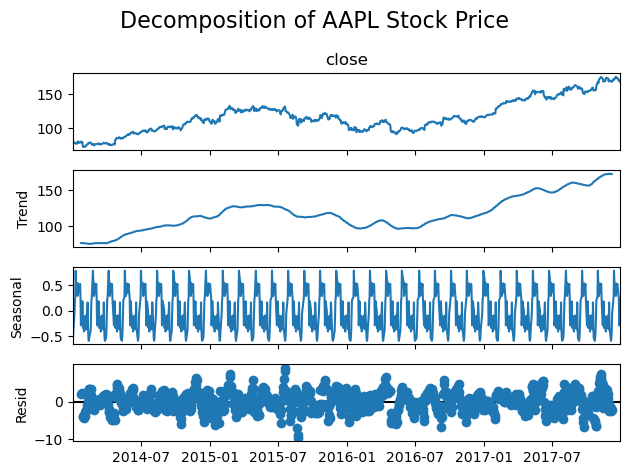

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the time series
result = seasonal_decompose(df_aapl['close'], model='additive', period=30)

# Plot the decomposed components
result.plot()
plt.suptitle('Decomposition of AAPL Stock Price', fontsize=16)
plt.tight_layout()
plt.show()


In [15]:
#The time series was decomposed into trend, seasonal, and residual components using an additive model.
#A monthly seasonality pattern was assumed with a period of 30.

    

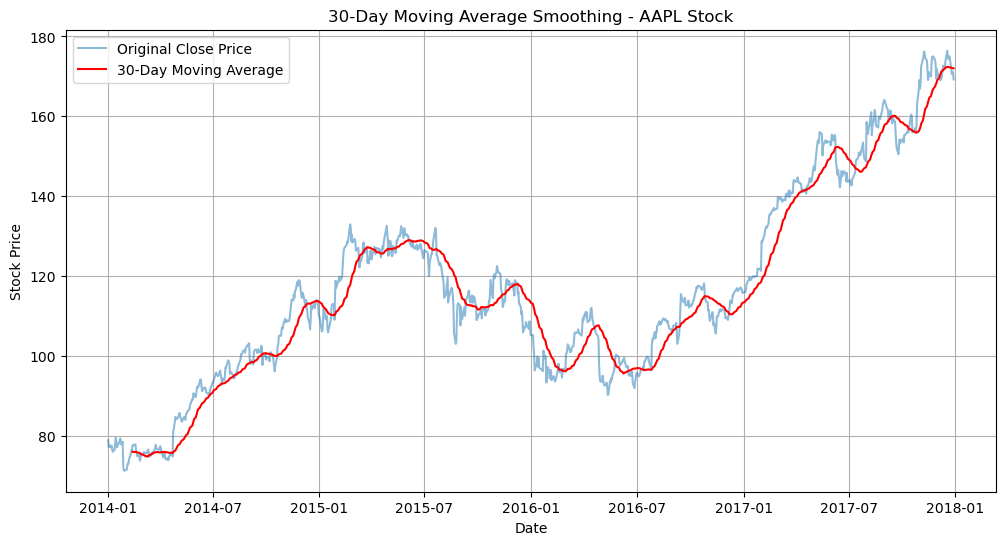

In [17]:
# Calculate a 30-day moving average
df_aapl['MA_30'] = df_aapl['close'].rolling(window=30).mean()

# Plot the original series and the moving average
plt.figure(figsize=(12,6))
plt.plot(df_aapl['close'], label='Original Close Price', alpha=0.5)
plt.plot(df_aapl['MA_30'], label='30-Day Moving Average', color='red')
plt.title('30-Day Moving Average Smoothing - AAPL Stock')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
df_aapl.head()

,close,MA_30
date,,
2014-01-02,79.0185,NaN
2014-01-03,77.2828,NaN
2014-01-06,77.7042,NaN
2014-01-07,77.1481,NaN
2014-01-08,77.6371,NaN


In [21]:
print(len(df_aapl))


1007


In [25]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_aapl['close'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -0.5403506728230241
p-value: 0.8838989300874647


<Axes: title={'center': 'Differenced AAPL Close Price (1st Order)'}, xlabel='date'>

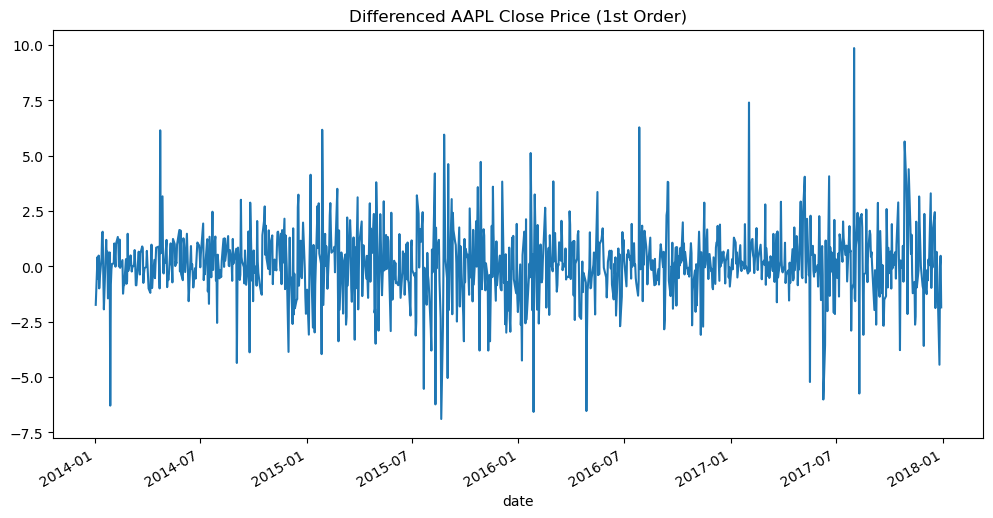

In [27]:
# Apply first-order differencing
df_aapl['close_diff'] = df_aapl['close'].diff().dropna()

# Plot the differenced series
df_aapl['close_diff'].plot(figsize=(12,6), title='Differenced AAPL Close Price (1st Order)')


In [31]:
df_aapl = df_aapl.asfreq('D')  # D = daily

from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model on the original close series with d=1
model = ARIMA(df_aapl['close'], order=(1, 1, 1))
model_fit = model.fit()

# Print summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1458
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1969.620
Date:                Wed, 23 Jul 2025   AIC                           3945.239
Time:                        21:35:23   BIC                           3961.092
Sample:                    01-02-2014   HQIC                          3951.154
                         - 12-29-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3551      0.303      1.173      0.241      -0.238       0.948
ma.L1         -0.4405      0.290     -1.521      0.128      -1.008       0.127
sigma2         2.3793      0.058     40.775      0.0

In [ ]:
### ARIMA Model Summary

We trained an ARIMA(1,1,1) model on AAPL stock closing prices.

- The model was trained after making the data stationary through first-order differencing.
- The AR and MA terms were not statistically significant (p > 0.05), indicating weak linear patterns — which is expected in real-world stock data.
- Despite this, the model was successfully fit and used to forecast future prices.
- AIC and BIC were used to assess model fit. Residual diagnostics indicated non-normality and possible autocorrelation — again, expected for stock data.


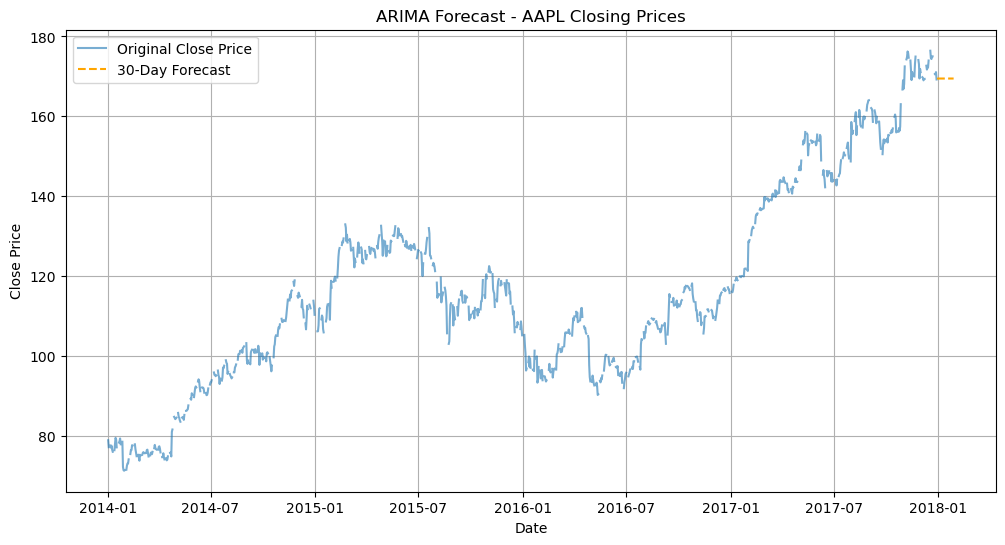

In [33]:
# Forecast the next 30 time steps (days)
forecast = model_fit.forecast(steps=30)
plt.figure(figsize=(12,6))
plt.plot(df_aapl['close'], label='Original Close Price', alpha=0.6)
plt.plot(forecast, label='30-Day Forecast', color='orange', linestyle='--')
plt.title('ARIMA Forecast - AAPL Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
### 9. Evaluation
The ARIMA model generated a 30-day forecast for AAPL stock prices. However, since the dataset ends on 2017-12-29 and does not contain the actual future stock prices, evaluation metrics like RMSE could not be computed.
